**Assignment 23 - Project 2**

In [96]:
# Predicting players rating:
# In this project you are going to predict the overall rating of soccer player based on their attributes
# such as 'crossing', 'finishing etc.

# The dataset you are going to use is from European Soccer Database 
# (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
# 10,000 players for European professional soccer seasons from 2008 to 2016.
# Download the data in the same folder and run the following commmand to get it in the environment

# About the Dataset:
# The ultimate Soccer database for data analysis and machine learning:
# The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
# matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
# 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
# with player names and a pair of coordinates to indicate their position on the pitch.
# +25,000 matches
# +10,000 players
# 11 European Countries with their lead championship
# Seasons 2008 to 2016
# Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the
# weekly updates
# Team line up with squad formation (X, Y coordinates)
# Betting odds from up to 10 providers
# Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000
# matches

# The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
# games. It is not just the stats that come with a new version of the game but also the weekly
# updates. So for instance if a player has performed poorly over a period of time and his stats get
# impacted in FIFA, you would normally see the same in the dataset.

# Import Libraries:
# # import sqlite3
# # import pandas as pd
# # from sklearn.tree import DecisionTreeRegressor
# # from sklearn.linear_model import LinearRegression
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import mean_squared_error
# # from math import sqrt

# Read Data from the Database into pandas:
# # # Create your connection.
# # cnx = sqlite3.connect('database.sqlite')
# # df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

# Import  Libraries

In [5]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Core Libraries - loading data from sqlite database
import sqlite3
 
# Core Libraries - Machine Learning
import sklearn

## Importing train_test_split,cross_val_score,GridSearchCV,KFold, RandomizedSearchCV - Validation and OptimizationC
from sklearn.model_selection import ShuffleSplit, train_test_split,cross_val_score,GridSearchCV,KFold, RandomizedSearchCV

# Importing Regressors - Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor

# Importing Regression Metrics - Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle

In [6]:
%matplotlib inline

In [7]:
# Create your connection
cnx = sqlite3.connect('database.sqlite')

In [8]:
# Loading the dataframe with the data from the Player_Attributes Table
player_attrib = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [9]:
player_attrib.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


# Understand Dataset and Data

Get the basic information about the dataset

In [10]:
print(player_attrib.columns)

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')


In [11]:
print(player_attrib.shape)

(183978, 42)


In [12]:
player_attrib.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [13]:
print(player_attrib.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

___There are null values in the dataset which need to be removed or imputed___

In [14]:
player_attrib.get_dtype_counts()

float64    35
int64       3
object      4
dtype: int64

# Data Cleaning

__Find rows containing null values or zeros(that don't belong in the dataset) and then either impute or remove them__

___Checking for columns containing null values___

In [15]:
player_attrib.isna().any() # To look for null element in atleast one row in the dataframe

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

***All columns in the dataframe have null values except the id, player_fifa_api_id, player_api_id, date columns***

In [17]:
#Performing a check to understand the number of null values in each column  
null_info_df = pd.DataFrame(player_attrib.isna().sum())  # Identifying the number of nulls in each column
null_info_df

,0
id,0
player_fifa_api_id,0
player_api_id,0
date,0
overall_rating,836
potential,836
preferred_foot,836
attacking_work_rate,3230
defensive_work_rate,836
crossing,836


In [18]:
# Performing a check to understand the percentage of null values in each column  
null_info_df["null_percentage"] = (player_attrib.isna().sum()/player_attrib.shape[0])*100
null_info_df

,0,null_percentage
id,0,0.000000
player_fifa_api_id,0,0.000000
player_api_id,0,0.000000
date,0,0.000000
overall_rating,836,0.454402
potential,836,0.454402
preferred_foot,836,0.454402
attacking_work_rate,3230,1.755645
defensive_work_rate,836,0.454402
crossing,836,0.454402


In [ ]:
** there are approx 1.5% null values i.e. is very less , so droping those values

In [19]:
# Dropping rows containing null values in the dataframe
player_attrib.dropna(axis = 0, inplace = True)

In [20]:
player_attrib.shape

(180354, 42)

_3624 rows containing one or more null values removed_

In [21]:
# Cross checking if the rows containing null values were removed
player_attrib.isna().sum() 

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


___Checking if there are any row values = zero that need our consideration so that we can decide to study those rows___

In [22]:
player_attrib.loc[(player_attrib==0).all(axis=1)].shape 

(0, 42)

___No zeroes in the dataframe to consider___

In [23]:
player_attrib.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [24]:
# Moving overall_rating column to the end of the dataframe
cols = list(player_attrib.columns.values) 
cols.pop(cols.index('overall_rating'))  
player_attrib = player_attrib[cols+['overall_rating']]  


In [25]:
player_attrib.columns.values

array(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing',
       'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping',
       'stamina', 'strength', 'long_shots', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'overall_rating'], dtype=object)

## Cleaning Categorical Columns

In [26]:
# Getting a  list of the categorical columns
categorical_cols = player_attrib.select_dtypes(include='object').columns.values
categorical_cols


array(['date', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate'], dtype=object)

In [27]:
# Getting a list of all the 
player_attrib[categorical_cols].get_dtype_counts()

object    4
dtype: int64

In [28]:
# Checking the number of unique values in the categorical columns
player_attrib[categorical_cols].nunique()

date                   197
preferred_foot           2
attacking_work_rate      8
defensive_work_rate     18
dtype: int64

In [29]:
# Checking the distribution of the values in the preferred_foot column
player_attrib["preferred_foot"].value_counts() 

right    136247
left      44107
Name: preferred_foot, dtype: int64

*The preferred_foot column doesn't need cleaning*

In [26]:
# Checking the distribution of date column
player_attrib["date"].value_counts()

2007-02-22 00:00:00    10410
2011-08-30 00:00:00     6520
2015-09-21 00:00:00     6518
2013-09-20 00:00:00     6513
2012-08-31 00:00:00     6491
2014-09-18 00:00:00     6429
2013-02-15 00:00:00     6373
2010-08-30 00:00:00     6232
2012-02-22 00:00:00     6134
2011-02-22 00:00:00     5340
2009-08-30 00:00:00     5312
2008-08-30 00:00:00     4873
2010-02-22 00:00:00     4160
2007-08-30 00:00:00     3921
2009-02-22 00:00:00     3048
2013-03-22 00:00:00     1945
2013-02-22 00:00:00     1487
2015-01-09 00:00:00     1480
2015-10-16 00:00:00     1469
2013-03-08 00:00:00     1292
2014-02-07 00:00:00     1244
2014-10-02 00:00:00     1217
2015-04-10 00:00:00     1188
2014-11-14 00:00:00     1187
2016-03-10 00:00:00     1180
2014-01-31 00:00:00     1064
2015-11-06 00:00:00     1060
2013-04-19 00:00:00     1048
2016-04-21 00:00:00     1044
2014-04-04 00:00:00     1036
                       ...  
2014-08-22 00:00:00       52
2016-06-23 00:00:00       52
2013-09-13 00:00:00       51
2015-01-28 00:

The date column item values don't need cleaning


In [30]:
# Checking the distribution of the values in the attacking_work_rate column
player_attrib["attacking_work_rate"].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

The attacking_work_rate column item values need to be set to medium, low or high as those are the only possible values for attacking_work_rate. 

Reference: http://www.fifplay.com/encyclopedia/work-rate/


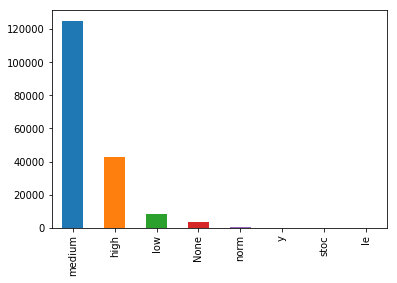

In [31]:
# Plotting the distribution of the values in the attacking_work_rate column
player_attrib["attacking_work_rate"].value_counts().plot.bar()

__We can choose to drop the columns where the categorical values do not make sense or we can replace those values into the three categories, medium, high, low__

###  Ignore this - Dropping rows with gibberish values in attacking_work_rate 

In [32]:
# To delete the rows which have the gibberish values
cleaned = player_attrib[~(player_attrib.attacking_work_rate.isin(['None','norm','y','stoc','le']))] # Delete the rows which the values in the list
               
(1- cleaned.shape[0]/player_attrib.shape[0])*100

2.1579781984319757

2.15% Data Loss

### To replace gibberish values with medium, low, high

medium    125070
high       42823
low        12461
Name: attacking_work_rate, dtype: int64


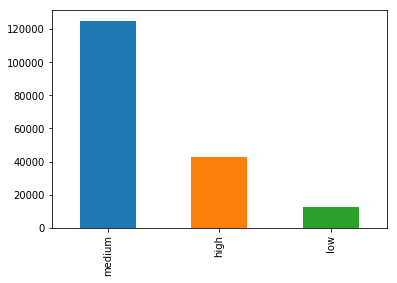

In [34]:
# Choosing to replace only with low because it can improve the variance of the column
player_attrib.replace( ['None','norm','y','stoc','le'],'low', inplace = True)
print(player_attrib["attacking_work_rate"].value_counts())
player_attrib["attacking_work_rate"].value_counts().plot.bar()

In [35]:
# Checking the distribution of the values in the defensive_work_rate column
player_attrib["defensive_work_rate"].value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

The defensive_work_rate column items need to be set into medium, low or high as those are the only possible values for defensive_work_rate. 

Reference: http://www.fifplay.com/encyclopedia/work-rate/

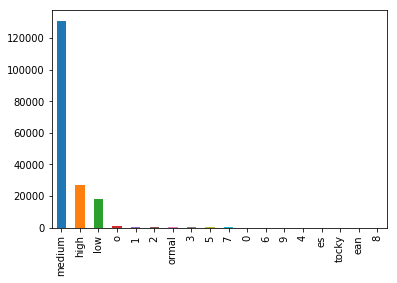

In [36]:
# Plotting the distribution of the values in the defensive_work_rate column
player_attrib["defensive_work_rate"].value_counts().plot.bar()

__WE can choose to drop the columns where the categorical values do not make sense or we can re-organize those values into the three categories, medium, high, low__

### Ignore this - Dropping rows with gibberish values in defensive_work_rate

In [37]:
# To delete the rows which have the gibberish values
cleaned1 = player_attrib[~(player_attrib.defensive_work_rate.isin(['o', '1', '2', 'ormal', '3', '5', '7', '0', 
                                                         '6', '9', '4', 'es', 'tocky', 'ean', '8']))] 

In [38]:
(1- cleaned1.shape[0]/player_attrib.shape[0])*100

2.2372667088060183

2.2% Data Loss

 __OR__

### To replace gibberish values with medium, low, high

medium    131372
high       27461
low        21521
Name: defensive_work_rate, dtype: int64


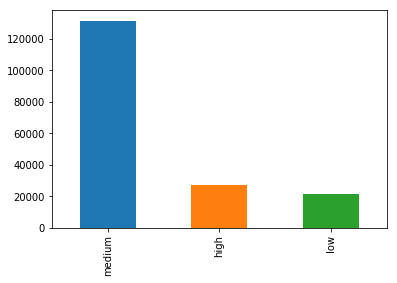

In [39]:
player_attrib.replace(['o', '1', '2', 'ormal', '3', '0', 'es', 'tocky', 'ean'],'low',inplace = True) 
player_attrib.replace(['5',  '6', '4'],'medium', inplace = True) 
player_attrib.replace([ '7', '9', '8'],'high', inplace = True) 
print(player_attrib["defensive_work_rate"].value_counts())
player_attrib["defensive_work_rate"].value_counts().plot.bar()

# Basic Statistical Information

In [40]:
# Getting basic statistical information about the numerical columns
player_attrib.describe() # Only numerical columns

,id,player_fifa_api_id,player_api_id,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000,180354.000000
mean,91995.886274,166822.125803,137653.145514,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,59.265755,...,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531,68.635317
std,53092.657914,52821.443279,137599.735284,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,17.741351,...,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545,7.027950
min,1.000000,2.000000,2625.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,33.000000
25%,46074.250000,156616.000000,35451.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000,64.000000
50%,92003.500000,183792.000000,80291.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000,69.000000
75%,137935.750000,200138.000000,192841.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000,73.000000
max,183978.000000,234141.000000,750584.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000,94.000000


In [41]:
# Getting correlation between various numerical columns
player_attrib.corr()

,id,player_fifa_api_id,player_api_id,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating
id,1.000000,0.003744,0.002048,0.000837,-0.020231,-0.008171,-0.011781,-0.006701,-0.006916,-0.014784,...,-0.011751,-0.010329,-0.012515,-0.011101,0.014251,0.010911,0.008758,0.014015,0.014671,-0.003738
player_fifa_api_id,0.003744,1.000000,0.556557,-0.021252,-0.065631,-0.029836,-0.103500,-0.065311,-0.088726,0.047551,...,-0.175255,-0.075568,-0.071128,-0.055218,-0.092945,-0.138844,-0.248222,-0.140925,-0.131531,-0.278703
player_api_id,0.002048,0.556557,1.000000,0.010588,-0.113365,-0.062312,-0.130282,-0.090237,-0.131262,0.015616,...,-0.162481,-0.089772,-0.086706,-0.073595,-0.071825,-0.125345,-0.229704,-0.125525,-0.121947,-0.328315
potential,0.000837,-0.021252,0.010588,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,0.339978,...,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936,0.765435
crossing,-0.020231,-0.065631,-0.113365,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,0.809747,...,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696,0.357320
finishing,-0.008171,-0.029836,-0.062312,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,0.784988,...,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302,0.330079
heading_accuracy,-0.011781,-0.103500,-0.130282,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,0.400803,...,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494,0.313324
short_passing,-0.006701,-0.065311,-0.090237,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,0.788935,...,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260,0.458243
volleys,-0.006916,-0.088726,-0.131262,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,0.784247,...,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267,0.361739
dribbling,-0.014784,0.047551,0.015616,0.339978,0.809747,0.784988,0.400803,0.788935,0.784247,1.000000,...,0.663420,0.004345,0.067306,0.044988,-0.654097,-0.650645,-0.432452,-0.653560,-0.656195,0.354191


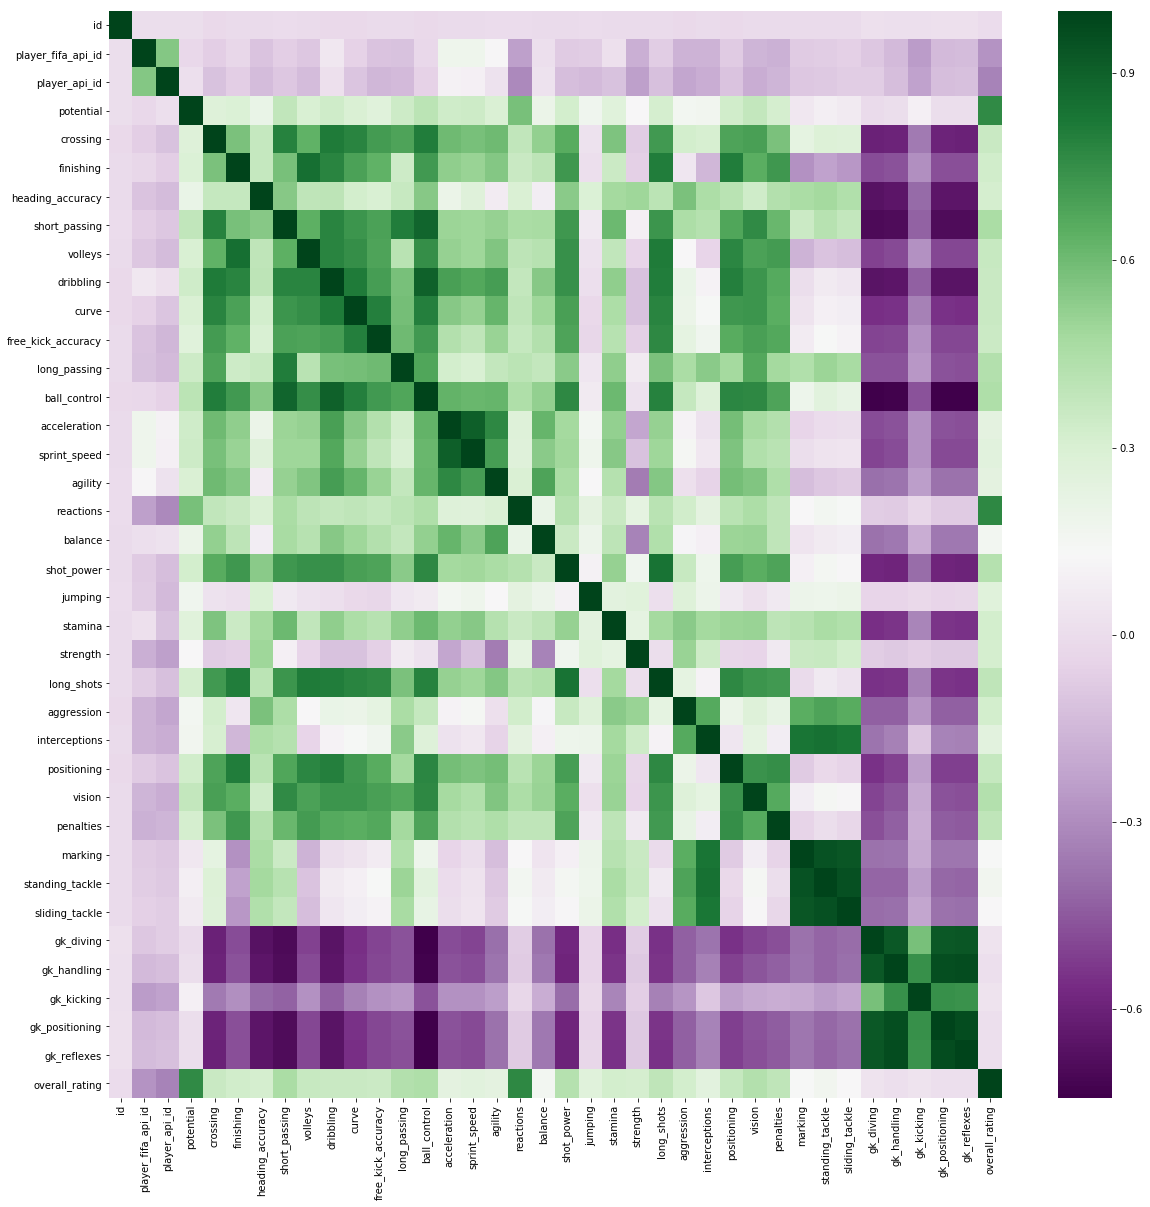

In [42]:
# Checking for correlations using HEATMAP
plt.figure(figsize=(20,20))
sns.heatmap(player_attrib.corr(), cmap="PRGn")

In [43]:
player_attrib.corr().loc['overall_rating']

id                   -0.003738
player_fifa_api_id   -0.278703
player_api_id        -0.328315
potential             0.765435
crossing              0.357320
finishing             0.330079
heading_accuracy      0.313324
short_passing         0.458243
volleys               0.361739
dribbling             0.354191
curve                 0.357566
free_kick_accuracy    0.349800
long_passing          0.434525
ball_control          0.443991
acceleration          0.243998
sprint_speed          0.253048
agility               0.239963
reactions             0.771856
balance               0.160211
shot_power            0.428053
jumping               0.258978
stamina               0.325606
strength              0.315684
long_shots            0.392668
aggression            0.322782
interceptions         0.249094
positioning           0.368978
vision                0.431493
penalties             0.392715
marking               0.132185
standing_tackle       0.163986
sliding_tackle        0.128054
gk_divin

***overall_rating is highly correlated with the reactions and potential columns(Correlation>0.7). It is moderately correlated with short_passing, long_passing,ball_control, shot_power,vision (correlation >0.4)***
 


# Exploratory Data Analysis

## Univariate - Visual Analysis - Distribution and countplots etc.

### Univariate Analysis of Categorical Data

In [44]:
categorical_cols

array(['date', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate'], dtype=object)

In [45]:
player_attrib[categorical_cols].head()

,date,preferred_foot,attacking_work_rate,defensive_work_rate
0,2016-02-18 00:00:00,right,medium,medium
1,2015-11-19 00:00:00,right,medium,medium
2,2015-09-21 00:00:00,right,medium,medium
3,2015-03-20 00:00:00,right,medium,medium
4,2007-02-22 00:00:00,right,medium,medium


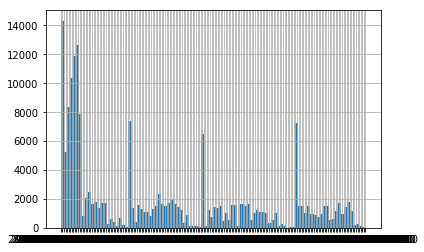

In [46]:
player_attrib.date.hist(bins=100)

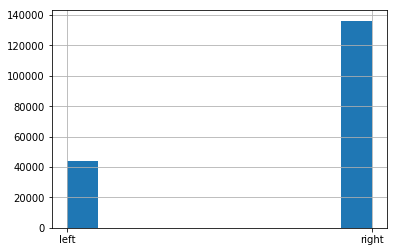

In [43]:
player_attrib.preferred_foot.hist()

___Majority of the players' preferred foot is the right leg___

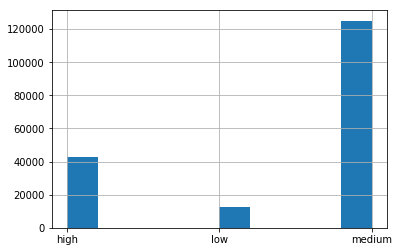

In [47]:
player_attrib.attacking_work_rate.hist()

___Majority of the players' attacking work rate is medium___

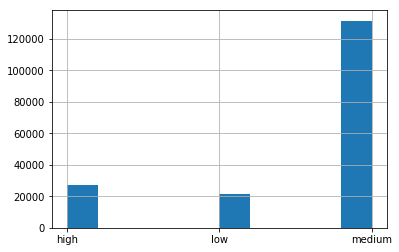

In [45]:
player_attrib.defensive_work_rate.hist()

___Majority of the players' defensive work rate is medium___

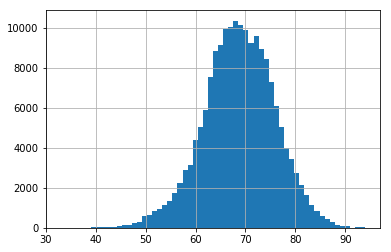

In [48]:
player_attrib['overall_rating'].hist(bins=60)

___Players' overall rating is normally distributed___

### Univariate Analysis of Numerical Data

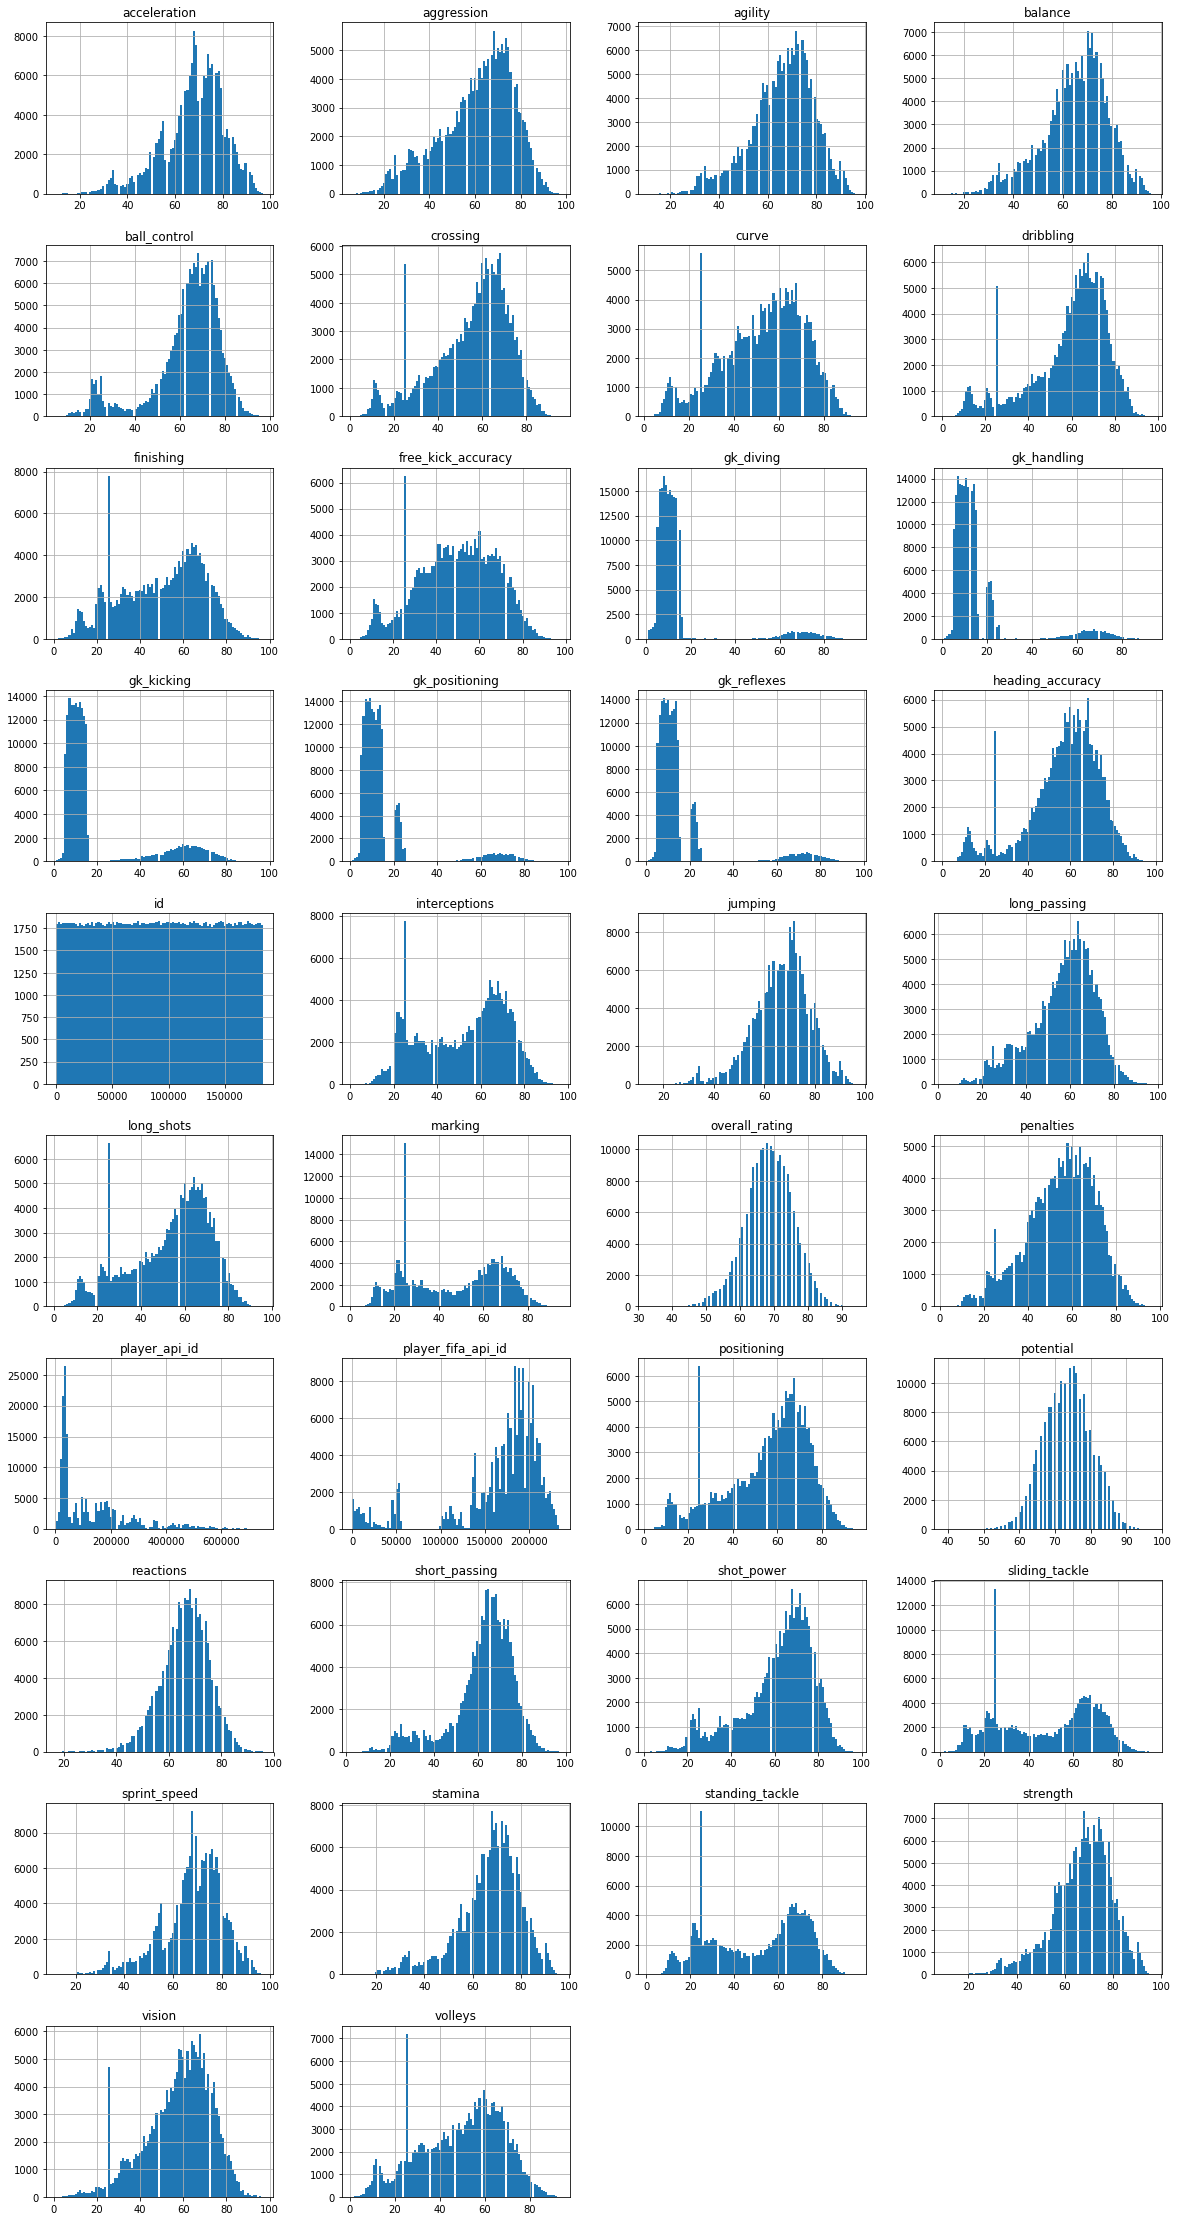

In [49]:
# Plotting the histograms of numerical columns to understand their distribution
player_attrib.hist(bins=100,figsize=(20,40),layout=(10,4))
plt.show() 

***The interception, marking, standing_tackle and diving_tackle column values follow bimodal distribution***

***The gk_diving, gk_relexes, gk_positioning, gk_kicking, gk_handling column values follow also bimodal distribution but are imbalanced***

***All other player attributes column values roughly follow normal distribution. This is to be expected as majority of the players have reasonably attributes but only some have exceptional attributes***

## Bi-variate -  Statistical and Visual Analysis

__Plotting: overall_rating vs  reactions and potential columns(Correlation>0.7) and short_passing, long_passing, ball_control, shot_power,vision (correlation >0.4)__

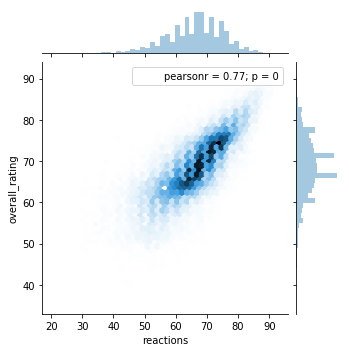

In [54]:
sns.jointplot(x=player_attrib["reactions"], y=player_attrib["overall_rating"], kind='hex',size = 5)

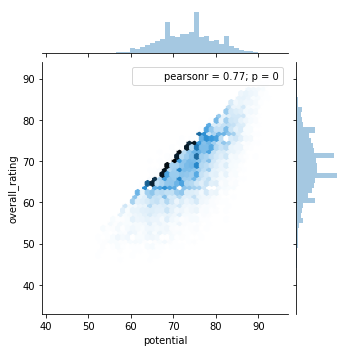

In [55]:
sns.jointplot(x=player_attrib["potential"], y=player_attrib["overall_rating"], kind='hex',size = 5)

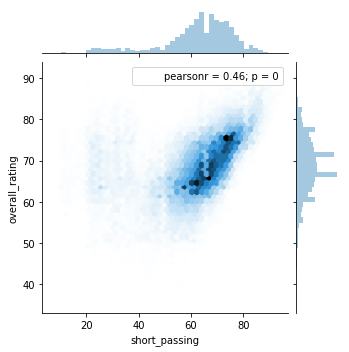

In [56]:
sns.jointplot(x=player_attrib["short_passing"], y=player_attrib["overall_rating"], kind='hex',size = 5)

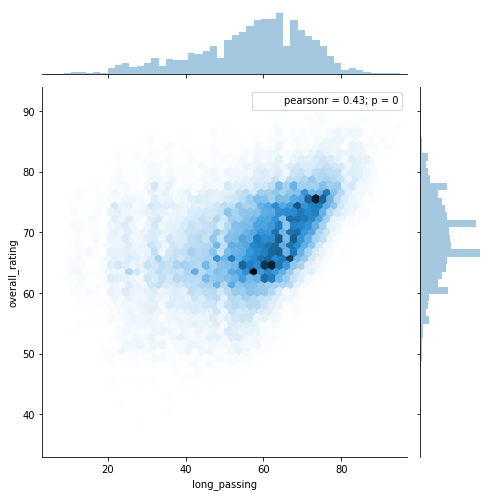

In [51]:
sns.jointplot(x=player_attrib["long_passing"], y=player_attrib["overall_rating"], kind='hex',size = 7)

# Feature Engineering - Preparing Data for Modeling

## Preparing the input vector X


In [60]:
X = player_attrib.drop("overall_rating",axis = 1)
X.shape, X.columns

((180354, 41),
 Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
        'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
        'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
        'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
        'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
        'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
        'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
        'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
        'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
       dtype='object'))

## Dropping the various ids in the dataset as they do not contribute to the regression model


In [61]:
X.drop("id",axis = 1, inplace = True)
X.drop("player_fifa_api_id",axis = 1, inplace = True)
X.drop("player_api_id",axis = 1, inplace = True)

## Modifying the date column in the input vector


In [62]:
X['year'] = pd.DatetimeIndex(X.date).year
X['month'] = pd.DatetimeIndex(X.date).month
X['day'] = pd.DatetimeIndex(X.date).day
X.drop('date',axis=1, inplace=True)

## Selecting columns for label encoding and encoding them

In [63]:
X_cat_cols = X.select_dtypes(include='object').columns.tolist()
X_cat_cols

['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

In [64]:
# LabelEncoding the preferred_foot, attacking_work_rate, defensive_work_rate
from sklearn.preprocessing import LabelEncoder
for i in X_cat_cols:
    lbl_enc = LabelEncoder()
    X[i] = lbl_enc.fit_transform(X[i])

In [65]:
# Checking the columns and the shape of the input vector after encoding
X.columns, X.shape

(Index(['potential', 'preferred_foot', 'attacking_work_rate',
        'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
        'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
        'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
        'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
        'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
        'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
        'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
        'gk_reflexes', 'year', 'month', 'day'],
       dtype='object'), (180354, 40))

In [66]:
X.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day
0,71.0,1,2,2,49.0,44.0,71.0,61.0,44.0,51.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,2,18
1,71.0,1,2,2,49.0,44.0,71.0,61.0,44.0,51.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11,19
2,66.0,1,2,2,49.0,44.0,71.0,61.0,44.0,51.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,9,21
3,65.0,1,2,2,48.0,43.0,70.0,60.0,43.0,50.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,3,20
4,65.0,1,2,2,48.0,43.0,70.0,60.0,43.0,50.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,2,22


## Preparing the Output Y

In [67]:
Y = player_attrib["overall_rating"]
Y.shape

(180354,)

In [68]:
Y.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

# Splitting the data into Train and Test

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state = 100)

# Fitting the models and collecting the metrics

## Linear Regression

In [70]:
lm  = LinearRegression()
model  = lm.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
    
print('Linear Regression -', 'RMSE Train:', math.sqrt(mean_squared_error(y_train_pred, y_train)))
print('Linear Regression -', 'RMSE Test:' ,math.sqrt(mean_squared_error(y_test_pred, y_test)))  
print('Linear Regression -', 'R2_score Train:', r2_score(y_train_pred, y_train))
print('Linear Regression -', 'R2_score Test:' ,r2_score(y_test_pred, y_test))  

Linear Regression - RMSE Train: 2.7309026846988043
Linear Regression - RMSE Test: 2.730777350395378
Linear Regression - R2_score Train: 0.8216028424294087
Linear Regression - R2_score Test: 0.8219679620041507


## Other Regressors

In [71]:
regressors = [
            ("Linear - ", LinearRegression(normalize=True)),
            ("Ridge - ",  Ridge(alpha=0.5, normalize=True)),
            ("Lasso - ",  Lasso(alpha=0.5, normalize=True)),
            ("ElasticNet - ",  ElasticNet(alpha=0.5, l1_ratio=0.5, normalize=True)),
            ("Decision Tree - ",  DecisionTreeRegressor(max_depth=5)),
            ("Random Forest - ",  RandomForestRegressor(n_estimators=100)),
            ("AdaBoost - ",  AdaBoostRegressor(n_estimators=100)),
            ("GBM - ", GradientBoostingRegressor(n_estimators=100))]

In [72]:
for reg in regressors:
    reg[1].fit(x_train, y_train)
    y_test_pred= reg[1].predict(x_test)
    print(reg[0],"\n\t R2-Score:", reg[1].score(x_test, y_test),
                 "\n\t RMSE:", math.sqrt(mean_squared_error(y_test_pred, y_test)),"\n")

Linear -  
	 R2-Score: 0.8501969196523183 
	 RMSE: 2.73077735039538 

Ridge -  
	 R2-Score: 0.8094085593573674 
	 RMSE: 3.080190780589965 

Lasso -  
	 R2-Score: -4.220879563199276e-06 
	 RMSE: 7.0554844132901415 

ElasticNet -  
	 R2-Score: -4.220879563199276e-06 
	 RMSE: 7.0554844132901415 

Decision Tree -  
	 R2-Score: 0.7786783353651396 
	 RMSE: 3.3192341052560117 

Random Forest -  
	 R2-Score: 0.9824041194635779 
	 RMSE: 0.9359042568169555 

AdaBoost -  
	 R2-Score: 0.8186531942844436 
	 RMSE: 3.004559959795495 

GBM -  
	 R2-Score: 0.9380248854563253 
	 RMSE: 1.7564451379448531 



# Feature Selection

___Feature Selection using feature importances from RandomForestRegressor model___


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

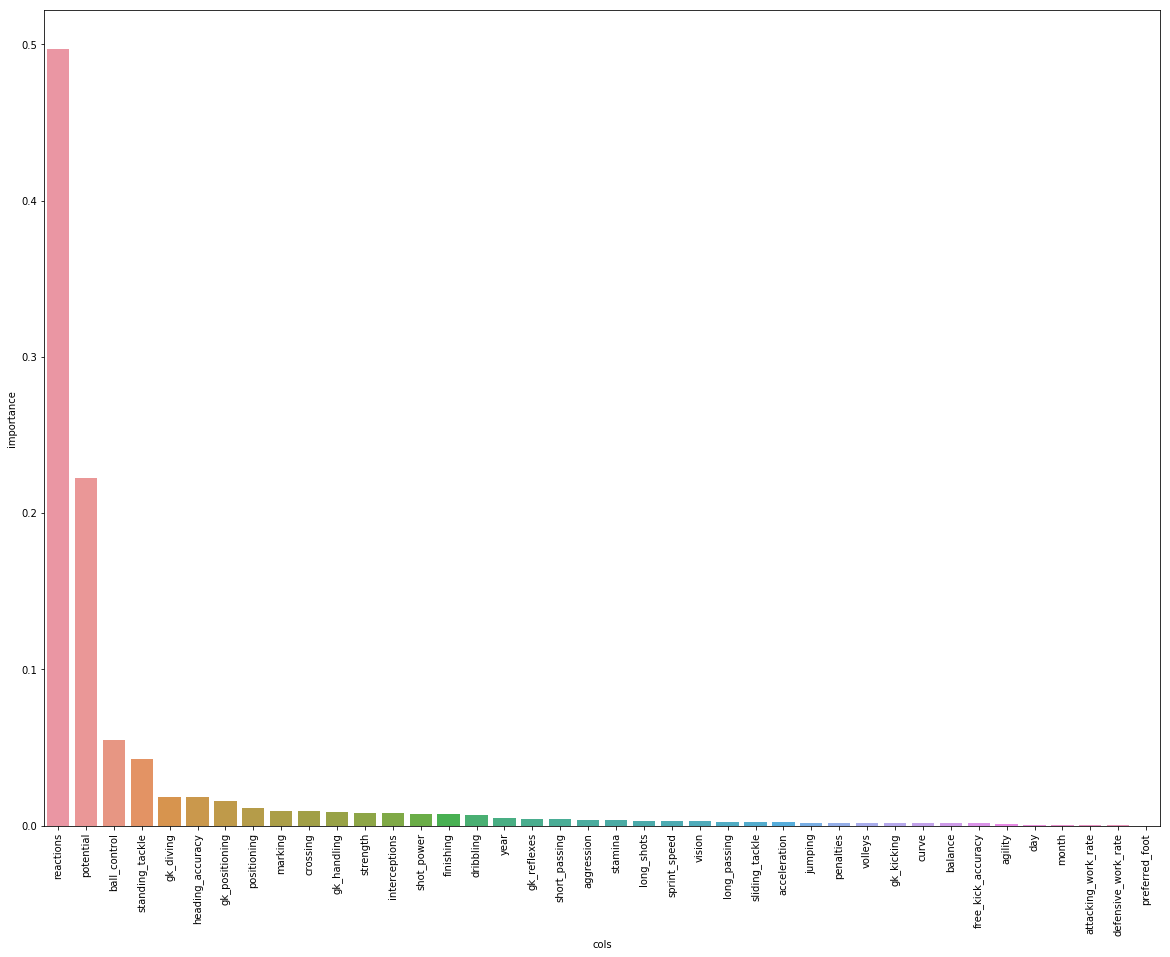

In [73]:
rndf = RandomForestRegressor(n_estimators=150)
rndf.fit(x_train, y_train)
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': rndf.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [74]:
imp_cols = importance[importance.importance >= 0.005].cols.values
imp_cols

array(['reactions', 'potential', 'ball_control', 'standing_tackle',
       'gk_diving', 'heading_accuracy', 'gk_positioning', 'positioning',
       'marking', 'crossing', 'gk_handling', 'strength', 'interceptions',
       'shot_power', 'finishing', 'dribbling', 'year'], dtype=object)

In [75]:
# Fitting models with columns where feature importance>=0.005
x_train, x_test, y_train, y_test = train_test_split(X[imp_cols],Y,test_size=0.75, random_state = 100)
for reg in regressors:
    reg[1].fit(x_train, y_train)
    y_test_pred= reg[1].predict(x_test)
    print(reg[0],"\n\t R2-Score:", reg[1].score(x_test, y_test),
                 "\n\t RMSE:", math.sqrt(mean_squared_error(y_test_pred, y_test)),"\n")

Linear -  
	 R2-Score: 0.8431273415851339 
	 RMSE: 2.783681625409858 

Ridge -  
	 R2-Score: 0.8003978321538426 
	 RMSE: 3.1399921438596183 

Lasso -  
	 R2-Score: -1.776966378042033e-06 
	 RMSE: 7.028235745736134 

ElasticNet -  
	 R2-Score: -1.776966378042033e-06 
	 RMSE: 7.028235745736134 

Decision Tree -  
	 R2-Score: 0.7741592409557474 
	 RMSE: 3.340004846504886 

Random Forest -  
	 R2-Score: 0.9653283748637406 
	 RMSE: 1.3086786997820135 

AdaBoost -  
	 R2-Score: 0.8305763922158786 
	 RMSE: 2.8928965089035215 

GBM -  
	 R2-Score: 0.9356063522104895 
	 RMSE: 1.7834767352457117 



In [76]:
imp_cols = importance[importance.importance >= 0.001].cols.values
imp_cols

array(['reactions', 'potential', 'ball_control', 'standing_tackle',
       'gk_diving', 'heading_accuracy', 'gk_positioning', 'positioning',
       'marking', 'crossing', 'gk_handling', 'strength', 'interceptions',
       'shot_power', 'finishing', 'dribbling', 'year', 'gk_reflexes',
       'short_passing', 'aggression', 'stamina', 'long_shots',
       'sprint_speed', 'vision', 'long_passing', 'sliding_tackle',
       'acceleration', 'jumping', 'penalties', 'volleys', 'gk_kicking',
       'curve', 'balance', 'free_kick_accuracy', 'agility'], dtype=object)

In [77]:
# Fitting models with columns where feature importance>=0.001
x_train, x_test, y_train, y_test = train_test_split(X[imp_cols],Y,test_size=0.75, random_state = 100)
for reg in regressors:
    reg[1].fit(x_train, y_train)
    y_test_pred= reg[1].predict(x_test)
    print(reg[0],"\n\t R2-Score:", reg[1].score(x_test, y_test),
                 "\n\t RMSE:", math.sqrt(mean_squared_error(y_test_pred, y_test)),"\n")

Linear -  
	 R2-Score: 0.8485016231507021 
	 RMSE: 2.735583178429208 

Ridge -  
	 R2-Score: 0.8097666691702011 
	 RMSE: 3.065414734954621 

Lasso -  
	 R2-Score: -1.776966378042033e-06 
	 RMSE: 7.028235745736134 

ElasticNet -  
	 R2-Score: -1.776966378042033e-06 
	 RMSE: 7.028235745736134 

Decision Tree -  
	 R2-Score: 0.7741592409557474 
	 RMSE: 3.340004846504886 

Random Forest -  
	 R2-Score: 0.9680321135002367 
	 RMSE: 1.256616902141094 

AdaBoost -  
	 R2-Score: 0.8387281543247305 
	 RMSE: 2.8224432127521553 

GBM -  
	 R2-Score: 0.9385145861893729 
	 RMSE: 1.7427375335042703 



___RandomForest and GBM provide us with the best RMSE and R2-Score when selecting columns with feature importance >= 0.001___

# Validation of the Models

___Validating our models using K-Fold Cross Validation for Robustness___

In [78]:
scoring = 'neg_mean_squared_error'
results=[]
names=[]
for modelname, model in regressors:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, x_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(modelname)
    print(modelname,"\n\t CV-Mean:", cv_results.mean(),
                    "\n\t CV-Std. Dev:",  cv_results.std(),"\n")

Linear -  
	 CV-Mean: -7.577425402593292 
	 CV-Std. Dev: 0.1881652662073941 

Ridge -  
	 CV-Mean: -9.527694490104617 
	 CV-Std. Dev: 0.3104263221463401 

Lasso -  
	 CV-Mean: -49.38186544635581 
	 CV-Std. Dev: 1.092422030903323 

ElasticNet -  
	 CV-Mean: -49.38186544635581 
	 CV-Std. Dev: 1.092422030903323 

Decision Tree -  
	 CV-Mean: -11.465003716652667 
	 CV-Std. Dev: 0.34653675521956645 

Random Forest -  
	 CV-Mean: -1.717148459139164 
	 CV-Std. Dev: 0.10152873437301052 

AdaBoost -  
	 CV-Mean: -7.988006847478836 
	 CV-Std. Dev: 0.3337065566539398 

GBM -  
	 CV-Mean: -3.1420739651710514 
	 CV-Std. Dev: 0.1394835771508512 



___RandomForest and GBM provide us with the best validation score, both w.r.t. CV-Mean and CV-Std. Dev___

__Therefore we choose these two models to optimize. We do this by finding best hyper-parameter values which give us even better R2-Score and RMSE values__

# Tuning Model for better Performance -- Hyper-Parameter Optimization

***Tuning the RandomForestRegressor, GradientBoostingRegressor Hyper-Parameters using GridSearchCV***

In [79]:
regressors

[('Linear - ',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)),
 ('Ridge - ', Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
     normalize=True, random_state=None, solver='auto', tol=0.001)),
 ('Lasso - ', Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
     normalize=True, positive=False, precompute=False, random_state=None,
     selection='cyclic', tol=0.0001, warm_start=False)),
 ('ElasticNet - ',
  ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
        max_iter=1000, normalize=True, positive=False, precompute=False,
        random_state=None, selection='cyclic', tol=0.0001, warm_start=False)),
 ('Decision Tree - ',
  DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, 

***Warning: Running the following optimization algorithms takes very long to complete.***

## Random Forest Regressor

In [80]:
RF_Regressor =  RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state = 100)

CV = ShuffleSplit(test_size=0.25, random_state=100)

param_grid = {"max_depth": [5, None],
              "n_estimators": [50, 100, 150, 200],
              "min_samples_split": [2, 4, 5],
              "min_samples_leaf": [2, 4, 6]
             }

In [81]:
rscv_grid = GridSearchCV(RF_Regressor, param_grid=param_grid, verbose=1)

In [82]:
rscv_grid.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed: 54.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, None], 'n_estimators': [50, 100, 150, 200], 'min_samples_split': [2, 4, 5], 'min_samples_leaf': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [83]:
rscv_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [84]:
model = rscv_grid.best_estimator_
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [85]:
model.score(x_test, y_test)

0.9677172492931098

In [86]:
RF_reg = pickle.dumps(rscv_grid)

## Gradient Boosting Regressor

In [87]:
GB_Regressor =  GradientBoostingRegressor(n_estimators=100)

CV = ShuffleSplit(test_size=0.25, random_state=100)

param_grid = {'max_depth': [5, 7, 9],
              'learning_rate': [0.1, 0.3, 0.5]
             }

In [88]:
rscv_grid = GridSearchCV(GB_Regressor, param_grid=param_grid, verbose=1)

In [89]:
rscv_grid.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 15.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 7, 9], 'learning_rate': [0.1, 0.3, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [90]:
rscv_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 9}

In [91]:
model = rscv_grid.best_estimator_
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=9, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [91]:
model.score(x_test, y_test)

0.9738262886317136

In [92]:
GB_reg = pickle.dumps(rscv_grid)

# Comparing performance metric of the different models

In [93]:
RF_regressor = pickle.loads(RF_reg)
GB_regressor = pickle.loads(GB_reg)

In [95]:
print("RandomForestRegressor - \n\t R2-Score:", RF_regressor.score(x_test, y_test),
                 "\n\t RMSE:", math.sqrt(mean_squared_error(RF_regressor.predict(x_test), y_test)),"\n")
      
print("GradientBoostingRegressor - \n\t R2-Score:", GB_regressor.score(x_test, y_test),
                 "\n\t RMSE:", math.sqrt(mean_squared_error(GB_regressor.predict(x_test), y_test)),"\n")

RandomForestRegressor - 
	 R2-Score: 0.9677101265725686 
	 RMSE: 1.2629294945564922 

GradientBoostingRegressor - 
	 R2-Score: 0.9738262886317136 
	 RMSE: 1.1370474512785247 



# Choosing the model

***We can see that Gradient Boosting Regressor gives better result with an R2-Score of more than 97% and while keeping RMSE value low(=1.1370474). So, XGBoost Regressor should be used as the regression model for this dataset.***